In [2]:
import json
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS as stopwords_wc

In [3]:
pd.set_option('display.max_colwidth', 100)

In [4]:
# Read the csv files containin gthe tweets by Eon Musk from 2010 to 2022.
df_2010 = pd.read_csv('elon_musk/2010.csv')
df_2011 = pd.read_csv('elon_musk/2011.csv')
df_2012 = pd.read_csv('elon_musk/2012.csv')
df_2013 = pd.read_csv('elon_musk/2013.csv')
df_2014 = pd.read_csv('elon_musk/2014.csv')
df_2015 = pd.read_csv('elon_musk/2015.csv')
df_2016 = pd.read_csv('elon_musk/2016.csv')
df_2017 = pd.read_csv('elon_musk/2017.csv')
df_2018 = pd.read_csv('elon_musk/2018.csv')
df_2019 = pd.read_csv('elon_musk/2019.csv')
df_2020 = pd.read_csv('elon_musk/2020.csv')
df_2021 = pd.read_csv('elon_musk/2021.csv')
df_2022 = pd.read_csv('elon_musk/2022.csv')

In [5]:
print(f"shape of 2010 df: " + str(df_2010.shape))
print(f"shape of 2011 df: " + str(df_2012.shape))
print(f"shape of 2012 df: " + str(df_2012.shape))
print(f"shape of 2013 df: " + str(df_2013.shape))
print(f"shape of 2014 df: " + str(df_2014.shape))
print(f"shape of 2015 df: " + str(df_2015.shape))
print(f"shape of 2016 df: " + str(df_2016.shape))
print(f"shape of 2017 df: " + str(df_2017.shape))
print(f"shape of 2018 df: " + str(df_2018.shape))
print(f"shape of 2019 df: " + str(df_2019.shape))
print(f"shape of 2020 df: " + str(df_2020.shape))
print(f"shape of 2021 df: " + str(df_2021.shape))
print(f"shape of 2022 df: " + str(df_2022.shape))

shape of 2010 df: (1, 39)
shape of 2011 df: (313, 39)
shape of 2012 df: (313, 39)
shape of 2013 df: (737, 39)
shape of 2014 df: (923, 39)
shape of 2015 df: (1253, 39)
shape of 2016 df: (2000, 39)
shape of 2017 df: (3167, 39)
shape of 2018 df: (2285, 39)
shape of 2019 df: (8312, 39)
shape of 2020 df: (11717, 39)
shape of 2021 df: (3115, 36)
shape of 2022 df: (1028, 36)


### From the above o/p I see that all the dataframes have the same number of columns (39) except for 2021 and 2022 (36). 

In [6]:
df_2010.columns

Index(['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'date', 'timezone',
       'place', 'tweet', 'language', 'hashtags', 'cashtags', 'user_id',
       'user_id_str', 'username', 'name', 'day', 'hour', 'link', 'urls',
       'photos', 'video', 'thumbnail', 'retweet', 'nlikes', 'nreplies',
       'nretweets', 'quote_url', 'search', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest'],
      dtype='object')

In [7]:
df_2022.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [8]:
df_tweets = pd.concat([df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,df_2021,df_2022],axis = 0)

In [9]:
df_tweets.shape

(34878, 44)

In [10]:
df_tweets.head()

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,reply_to,retweet_date,translate,trans_src,trans_dest,time,mentions,replies_count,retweets_count,likes_count
0,0.0,15434727182,15434727182,1275676317000.0,2010-06-04 18:31:57,0,NaN,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.0,152153637639028736,152151847614943233,1325111228000.0,2011-12-28 22:27:08,0,NaN,@TheOnion So true :),en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,151809315026636800,151809315026636800,1325029135000.0,2011-12-27 23:38:55,0,NaN,If you ever wanted to know the *real* truth about the moon landings ...(best Onion article ever)...,en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,151338939389706242,151338939389706242,1324916990000.0,2011-12-26 16:29:50,0,NaN,Walked around a neighborhood recently rebuilt with help from APJ and others http://t.co/KYHjsS1k,en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,151337237429239808,151337237429239808,1324916584000.0,2011-12-26 16:23:04,0,NaN,"It was Xmas, so we brought presents for the kids at the orphanage. They don't usually get much. ...",en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34878 entries, 0 to 1027
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30735 non-null  float64
 1   id               34878 non-null  int64  
 2   conversation_id  34878 non-null  int64  
 3   created_at       34878 non-null  object 
 4   date             34878 non-null  object 
 5   timezone         34878 non-null  int64  
 6   place            0 non-null      float64
 7   tweet            34878 non-null  object 
 8   language         34878 non-null  object 
 9   hashtags         34878 non-null  object 
 10  cashtags         34878 non-null  object 
 11  user_id          34878 non-null  int64  
 12  user_id_str      30735 non-null  float64
 13  username         34878 non-null  object 
 14  name             34878 non-null  object 
 15  day              30735 non-null  float64
 16  hour             30735 non-null  float64
 17  link         

In [12]:
df_tweets["hashtags"].value_counts()

[]                               34608
['dragonlaunch']                    48
['dragon']                          47
['apspacechat']                     16
['sxsw']                            14
['occupymars']                      11
['falconheavy']                      9
['awesomexmasgifts']                 8
['climate']                          8
['grasshopperproject']               8
['occupymars', 'apspacechat']        8
['antarctica']                       8
['plutostamp']                       8
['whatcouldpossiblygowrong']         8
['zeitgeist2012']                    8
['sb47']                             7
['hhgttg']                           7
['teslatx']                          7
['katiewoodencloak']                 7
['yutu']                             6
['donotpanic']                       3
['throwflamesresponsibly']           3
['pravduh']                          3
['falconheavy', 'spacex']            3
['newprofilepic']                    2
['moneygang']            

In [13]:
df_tweets_new = df_tweets[["date","tweet","nlikes","nreplies","nretweets","replies_count","retweets_count","likes_count"]]
df_tweets_new.head()

,date,tweet,nlikes,nreplies,nretweets,replies_count,retweets_count,likes_count
0,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",4652.0,391.0,348.0,NaN,NaN,NaN
0,2011-12-28 22:27:08,@TheOnion So true :),12.0,7.0,1.0,NaN,NaN,NaN
1,2011-12-27 23:38:55,If you ever wanted to know the *real* truth about the moon landings ...(best Onion article ever)...,39.0,13.0,34.0,NaN,NaN,NaN
2,2011-12-26 16:29:50,Walked around a neighborhood recently rebuilt with help from APJ and others http://t.co/KYHjsS1k,155.0,9.0,18.0,NaN,NaN,NaN
3,2011-12-26 16:23:04,"It was Xmas, so we brought presents for the kids at the orphanage. They don't usually get much. ...",158.0,15.0,13.0,NaN,NaN,NaN


In [14]:
#Convert the date column from string to "datetime" column. extracting just the date.
df_tweets_new['date'] = pd.to_datetime(df_tweets_new['date']).dt.date
df_tweets_new.head()

C:\Users\shreh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,tweet,nlikes,nreplies,nretweets,replies_count,retweets_count,likes_count
0,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",4652.0,391.0,348.0,NaN,NaN,NaN
0,2011-12-28,@TheOnion So true :),12.0,7.0,1.0,NaN,NaN,NaN
1,2011-12-27,If you ever wanted to know the *real* truth about the moon landings ...(best Onion article ever)...,39.0,13.0,34.0,NaN,NaN,NaN
2,2011-12-26,Walked around a neighborhood recently rebuilt with help from APJ and others http://t.co/KYHjsS1k,155.0,9.0,18.0,NaN,NaN,NaN
3,2011-12-26,"It was Xmas, so we brought presents for the kids at the orphanage. They don't usually get much. ...",158.0,15.0,13.0,NaN,NaN,NaN


In [15]:
# Let us sort the dates in ascending order.
df_tweets_new.sort_values(by=['date'], inplace=True, ascending=True)
df_tweets_new.reset_index(drop=True, inplace=True)
df_tweets_new.head(20)

C:\Users\shreh\anaconda3\envs\PythonData\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,date,tweet,nlikes,nreplies,nretweets,replies_count,retweets_count,likes_count
0,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",4652.0,391.0,348.0,NaN,NaN,NaN
1,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",4652.0,391.0,348.0,NaN,NaN,NaN
2,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",4652.0,391.0,348.0,NaN,NaN,NaN
3,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",4652.0,391.0,348.0,NaN,NaN,NaN
4,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",4652.0,391.0,348.0,NaN,NaN,NaN
5,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",4652.0,391.0,348.0,NaN,NaN,NaN
6,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",4652.0,391.0,348.0,NaN,NaN,NaN
7,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",4652.0,391.0,348.0,NaN,NaN,NaN
8,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",4652.0,391.0,348.0,NaN,NaN,NaN
9,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",4652.0,391.0,348.0,NaN,NaN,NaN


#### After sorting the records in ascending order, we see a lot of duplicate records. These duplicate records need to be removed.

In [16]:
#Checking for duplicate records
df_tweets_new[df_tweets_new.duplicated(keep='first')][:10]

,date,tweet,nlikes,nreplies,nretweets,replies_count,retweets_count,likes_count
1,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",4652.0,391.0,348.0,NaN,NaN,NaN
2,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",4652.0,391.0,348.0,NaN,NaN,NaN
3,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",4652.0,391.0,348.0,NaN,NaN,NaN
4,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",4652.0,391.0,348.0,NaN,NaN,NaN
5,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",4652.0,391.0,348.0,NaN,NaN,NaN
6,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",4652.0,391.0,348.0,NaN,NaN,NaN
7,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",4652.0,391.0,348.0,NaN,NaN,NaN
8,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",4652.0,391.0,348.0,NaN,NaN,NaN
9,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",4652.0,391.0,348.0,NaN,NaN,NaN
12,2011-12-01,"Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys...",189.0,32.0,15.0,NaN,NaN,NaN


In [17]:
#Drop duplicate records from the dataframe and reset the index
df_tweets_final = df_tweets_new.drop_duplicates(keep='first')
df_tweets_final.reset_index(drop=True, inplace=True)
df_tweets_final.head(15)

,date,tweet,nlikes,nreplies,nretweets,replies_count,retweets_count,likes_count
0,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",4652.0,391.0,348.0,NaN,NaN,NaN
1,2011-12-01,"Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys...",189.0,32.0,15.0,NaN,NaN,NaN
2,2011-12-01,I made the volume on the Model S http://t.co/wMCnT53M go to 11. Now I just need to work in a m...,78.0,31.0,9.0,NaN,NaN,NaN
3,2011-12-03,That was a total non sequitur btw,53.0,31.0,6.0,NaN,NaN,NaN
4,2011-12-03,"Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replie...",29.0,7.0,25.0,NaN,NaN,NaN
5,2011-12-04,Am reading a great biography of Ben Franklin by Isaacson. Highly recommended.,65.0,17.0,9.0,NaN,NaN,NaN
6,2011-12-21,"Got called randomly by Kanye West today and received a download of his thoughts, ranging from sh...",1068.0,19.0,546.0,NaN,NaN,NaN
7,2011-12-21,His singing and acting talent will be sorely missed: http://t.co/IIFKob75 South Park sequel co...,32.0,6.0,2.0,NaN,NaN,NaN
8,2011-12-21,"Yeah, this really is me, as my Mom @mayemusk will attest. Not sure I can handle just doing 140 c...",34.0,11.0,4.0,NaN,NaN,NaN
9,2011-12-21,Yum! Even better than deep fried butter: http://t.co/Ody21NuD,10.0,7.0,2.0,NaN,NaN,NaN


In [18]:
print(df_tweets_final.shape)

(17879, 8)


#### After dropping the duplicate records we see that only half of the records remain. Let us no clean the tweets, ie remove all the #,@ symbols. 

In [19]:
#Lets clean the tweets (remove @'s' and urls and)
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
new = []
for t in df_tweets_final.tweet:
    words = t.split()
    t = t.split()
    t = ' '.join(word for word in t if not word.startswith('@'))
    t = t.split()
    t = ' '.join(word for word in t if not word.startswith('http'))
    new.append(t)
    
df_tweets_final['tweet'] = new
df_tweets_final

C:\Users\shreh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,date,tweet,nlikes,nreplies,nretweets,replies_count,retweets_count,likes_count
0,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",4652.0,391.0,348.0,NaN,NaN,NaN
1,2011-12-01,"Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys....",189.0,32.0,15.0,NaN,NaN,NaN
2,2011-12-01,I made the volume on the Model S go to 11. Now I just need to work in a miniature Stonehenge...,78.0,31.0,9.0,NaN,NaN,NaN
3,2011-12-03,That was a total non sequitur btw,53.0,31.0,6.0,NaN,NaN,NaN
4,2011-12-03,"Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replie...",29.0,7.0,25.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
17874,2022-03-05,"And also my sympathies to the great people of Russia, who do not want this",NaN,NaN,NaN,4092.0,14745.0,256908.0
17875,2022-03-05,🇺🇦🇺🇦🇺🇦 Hold Strong Ukraine 🇺🇦🇺🇦🇺🇦,NaN,NaN,NaN,9853.0,42711.0,407741.0
17876,2022-03-05,"Obviously, this would negatively affect Tesla, but sustainable energy solutions simply cannot re...",NaN,NaN,NaN,4111.0,16195.0,155764.0
17877,2022-03-05,"In a way, this is free QA haha",NaN,NaN,NaN,258.0,210.0,4609.0


In [20]:
pd.DatetimeIndex(df_tweets_final["date"]).year

Int64Index([2010, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='date', length=17879)

### Visualize the nunber of tweets from 2010 to 2022 of Elon Musk

In [21]:
# Get the number of tweets every year by Elon Musk
date_count_df = df_tweets_final.groupby(pd.DatetimeIndex(df_tweets_final["date"]).year)["tweet"].count()
date_count_df = date_count_df.to_frame()
date_count_df

,tweet
date,
2010,1
2011,42
2012,272
2013,422
2014,188
2015,328
2016,754
2017,1170
2018,4579


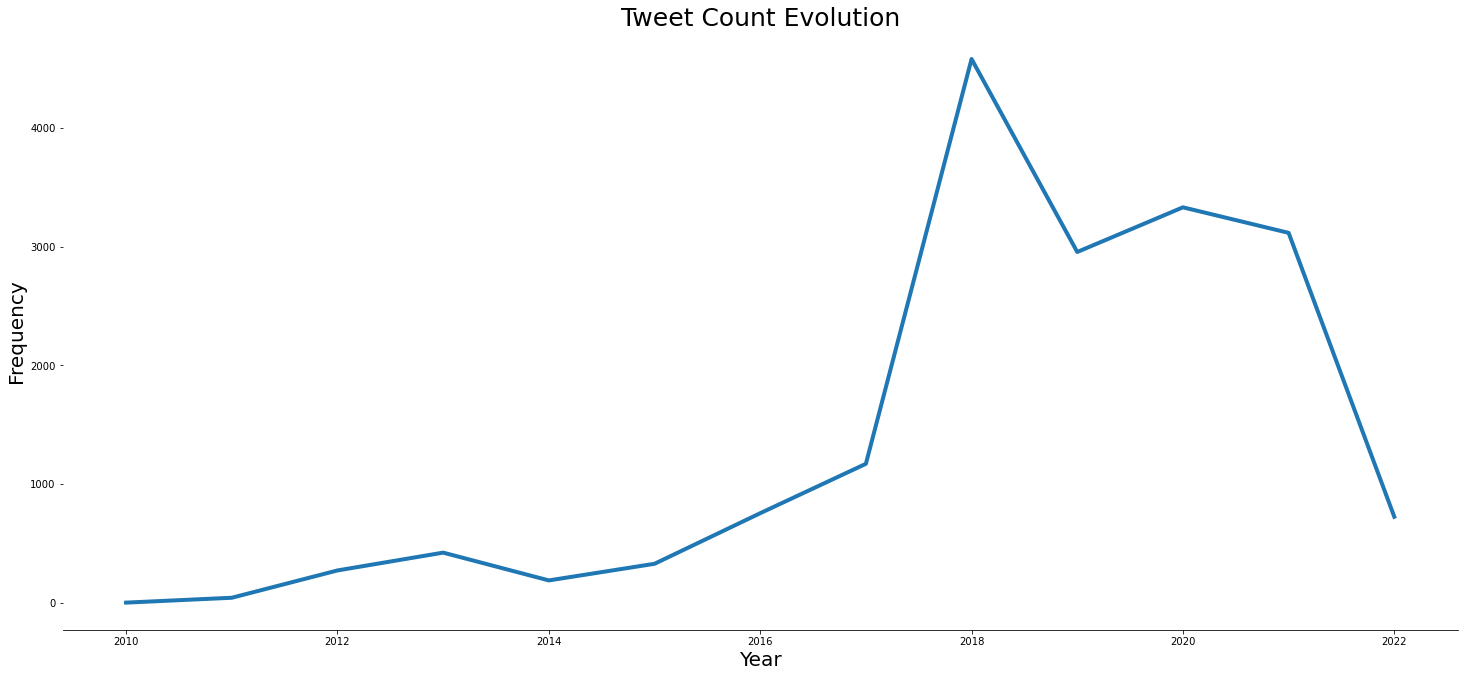

In [22]:
# Plot
plt.figure(figsize=(25, 11))
ax = sns.lineplot(data=date_count_df, x= "date", y= "tweet", lw=4)
plt.title("Tweet Count Evolution", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Frequency", size=20)
sns.despine(left=True)

### The number of tweets by Elon Musk kept increasing every year from 2010. Maximum number of tweets were generated in year 2018.

### Filter the tweets containing the word "doge"

In [23]:
#Filter the dogecoin tweets from the df_tweets_new dataset
df_doge = pd.DataFrame(columns = ['Date', 'Tweet'])

for i in range(len(df_tweets_final)):
    cur = df_tweets_final.loc[i].tweet
    cur = cur.lower()
    if 'doge' in cur:
        df_doge = df_doge.append({'Date' : df_tweets_final.loc[i].date, 'Tweet' : df_tweets_final.loc[i].tweet, 
                                  "nlikes":df_tweets_final.loc[i].nlikes,"nreplies":df_tweets_final.loc[i].nreplies,
                                  "nretweets":df_tweets_final.loc[i].nretweets,
                                  'replies_count' : df_tweets_final.loc[i].replies_count,
                                  'retweets_count' : df_tweets_final.loc[i].retweets_count,
                                  'likes_count' : df_tweets_final.loc[i].likes_count,
                                 },
                ignore_index = True)

df_doge['Date'] = pd.to_datetime(df_doge['Date'], format='%Y-%m-%d')
df_doge

,Date,Tweet,likes_count,nlikes,nreplies,nretweets,replies_count,retweets_count
0,2019-04-02,Dogecoin value may vary,NaN,20160.0,1080.0,1959.0,NaN,NaN
1,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s pretty cool.,NaN,9063.0,558.0,2428.0,NaN,NaN
2,2019-04-02,Dogecoin rulz,NaN,138893.0,1732.0,16539.0,NaN,NaN
3,2020-04-25,Dogecoin Mode,NaN,2192.0,124.0,207.0,NaN,NaN
4,2020-07-18,"Excuse me, I only sell Doge!",NaN,15930.0,416.0,775.0,NaN,NaN
...,...,...,...,...,...,...,...,...
63,2021-12-14,Tesla will make some merch buyable with Doge &amp; see how it goes,363960.0,NaN,NaN,NaN,49984.0,53938.0
64,2021-12-23,That’s why I’m pro Doge,30980.0,NaN,NaN,NaN,4203.0,6149.0
65,2022-01-14,Tesla merch buyable with Dogecoin,332825.0,NaN,NaN,NaN,38725.0,51727.0
66,2022-01-25,I will eat a happy meal on tv if accepts Dogecoin,422498.0,NaN,NaN,NaN,31009.0,59390.0


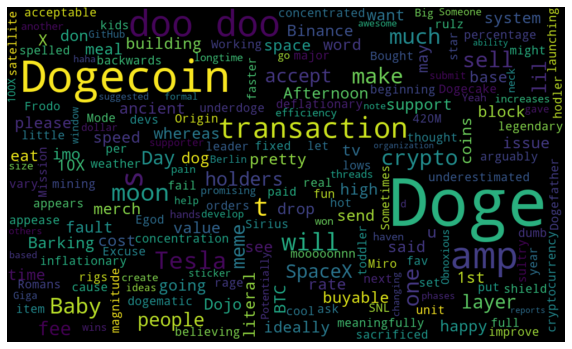

In [24]:
plt.figure(figsize=(10,8))
allWords = ' '.join([twts for twts in df_doge["Tweet"]])
wordCloud = WordCloud(width = 1000, height = 600, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [25]:
# Get the number of tweets every year by Elon Musk
date_doge_df = df_doge.groupby(pd.DatetimeIndex(df_doge["Date"]).year)["Tweet"].count()
date_doge_df = date_doge_df.to_frame()
date_doge_df

,Tweet
Date,
2019,3
2020,4
2021,58
2022,3


Text(0, 0.5, 'Frequency')

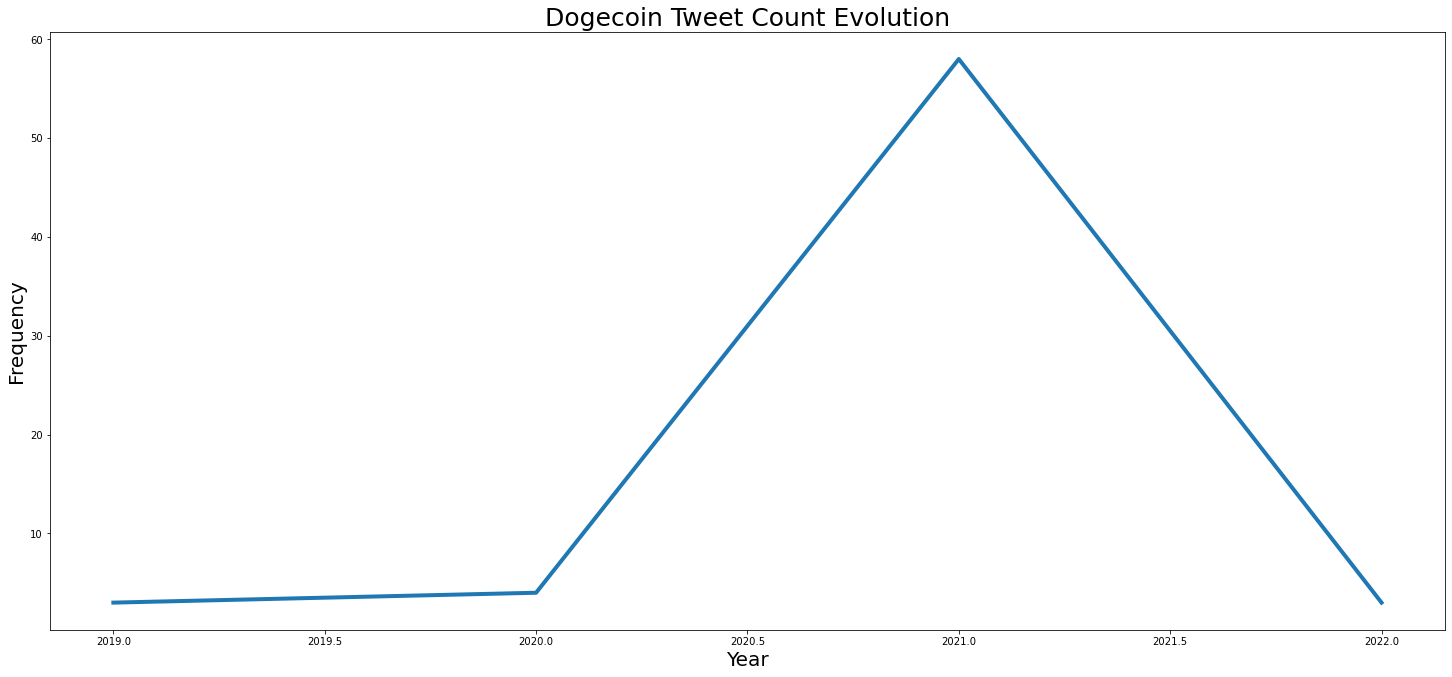

In [26]:
# Plot the number of tweets for dogecoing by elon musk
plt.figure(figsize=(25, 11))
ax = sns.lineplot(data=date_doge_df, x= "Date", y= "Tweet", lw=4)
plt.title("Dogecoin Tweet Count Evolution", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Frequency", size=20)
# sns.despine(left=True)

### Filter the tweets containing the word "spaceX"

In [27]:
#Filter the spaceX tweets from the df_tweets_final dataset
df_spaceX= pd.DataFrame(columns = ['Date', 'Tweet'])

for i in range(len(df_tweets_final)):
    cur = df_tweets_final.loc[i].tweet
    cur = cur.lower()
    if 'space' in cur:
        df_spaceX = df_spaceX.append({'Date' : df_tweets_final.loc[i].date, 'Tweet' : df_tweets_final.loc[i].tweet, 
                                      "nlikes":df_tweets_final.loc[i].nlikes,"nreplies":df_tweets_final.loc[i].nreplies,
                                      "nretweets":df_tweets_final.loc[i].nretweets,
                                      'replies_count' : df_tweets_final.loc[i].replies_count,
                                      'retweets_count' : df_tweets_final.loc[i].retweets_count,
                                      'likes_count' : df_tweets_final.loc[i].likes_count,
                                     }, 
                                      ignore_index = True)

df_spaceX['Date'] = pd.to_datetime(df_spaceX['Date'], format='%Y-%m-%d')
df_spaceX

,Date,Tweet,likes_count,nlikes,nreplies,nretweets,replies_count,retweets_count
0,2011-12-24,Kanye stopped by the SpaceX rocket factory today.,NaN,117055.0,1332.0,8414.0,NaN,NaN
1,2011-12-30,China unveils ambitious space strategy,NaN,317.0,13.0,17.0,NaN,NaN
2,2011-12-30,"SpaceX has Boeing, Lockheed, Europe (Ariane) and Russia (Proton/Soyuz) near checkmate in rocket ...",NaN,453.0,20.0,49.0,NaN,NaN
3,2012-01-06,Next month is also when our Dragon spaceship docks with the Space Station for the first time. Ma...,NaN,51.0,15.0,38.0,NaN,NaN
4,2012-01-24,Design completed for bringing rocket back to launchpad using only thrusters. Yay. Wings r just d...,NaN,331.0,35.0,146.0,NaN,NaN
...,...,...,...,...,...,...,...,...
597,2022-02-25,"LIDAR is a seductive local maximum. SpaceX designed &amp; built them to dock with ISS. However, ...",6544.0,NaN,NaN,NaN,513.0,636.0
598,2022-03-03,Ukraine civilian Internet was experiencing strange outages – bad weather perhaps? – so SpaceX is...,32276.0,NaN,NaN,NaN,1077.0,3724.0
599,2022-03-03,Ukraine civilian Internet was experiencing strange outages – bad weather perhaps? – so SpaceX is...,32273.0,NaN,NaN,NaN,1077.0,3724.0
600,2022-03-05,SpaceX reprioritized to cyber defense &amp; overcoming signal jamming. Will cause slight delays ...,85461.0,NaN,NaN,NaN,2905.0,7595.0


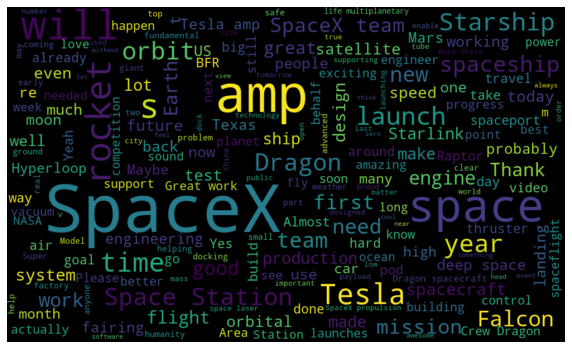

In [28]:
plt.figure(figsize=(10,8))
allWords = ' '.join([twts for twts in df_spaceX["Tweet"]])
wordCloud = WordCloud(width = 1000, height = 600, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [29]:
# Get the number of tweets every year by Elon Musk
date_spaceX_df = df_spaceX.groupby(pd.DatetimeIndex(df_spaceX["Date"]).year)["Tweet"].count()
date_spaceX_df = date_spaceX_df.to_frame()
date_spaceX_df

,Tweet
Date,
2011,3
2012,39
2013,17
2014,14
2015,24
2016,21
2017,50
2018,139
2019,100


Text(0, 0.5, 'Frequency')

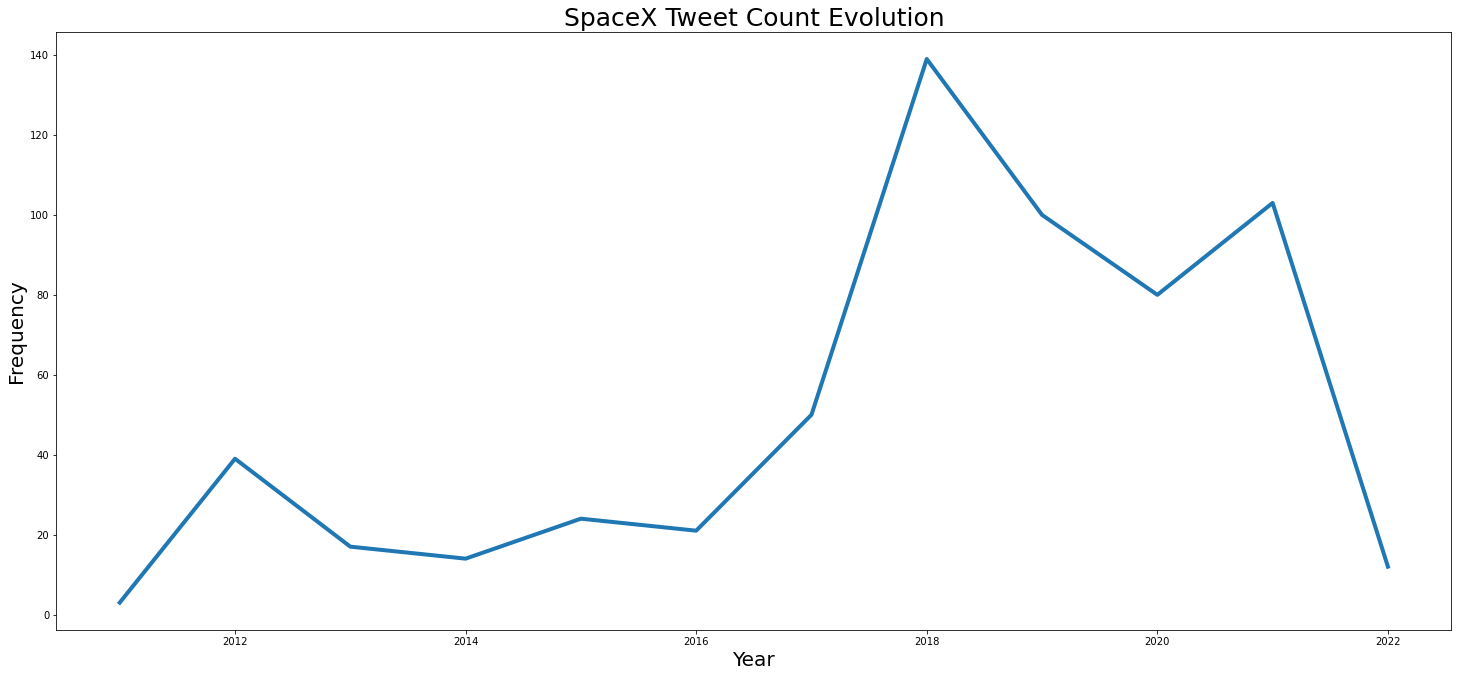

In [30]:
# Plot the number of tweets for spaceX by elon musk
plt.figure(figsize=(25, 11))
ax = sns.lineplot(data=date_spaceX_df, x= "Date", y= "Tweet", lw=4)
plt.title("SpaceX Tweet Count Evolution", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Frequency", size=20)

### Filter the tweets containing the word "tesla"

In [32]:
#Filter the dogecoin tweets from the df_tweets_new dataset
df_tesla= pd.DataFrame(columns = ['Date', 'Tweet'])

for i in range(len(df_tweets_final)):
    cur = df_tweets_final.loc[i].tweet
    cur = cur.lower()
    if 'tesla' in cur:
        df_tesla = df_tesla.append({'Date' : df_tweets_final.loc[i].date, 'Tweet' : df_tweets_final.loc[i].tweet, 
                                    "nlikes":df_tweets_final.loc[i].nlikes,"nreplies":df_tweets_final.loc[i].nreplies,
                                    "nretweets":df_tweets_final.loc[i].nretweets,
                                    'replies_count' : df_tweets_final.loc[i].replies_count,
                                    'retweets_count' : df_tweets_final.loc[i].retweets_count,
                                    'likes_count' : df_tweets_final.loc[i].likes_count,
                                   }, 
                                   ignore_index = True)

df_tesla['Date'] = pd.to_datetime(df_tesla['Date'], format='%Y-%m-%d')
df_tesla

,Date,Tweet,likes_count,nlikes,nreplies,nretweets,replies_count,retweets_count
0,2011-12-31,Hacked my Tesla charge connector on a small island in the rain last night #whatcouldpossiblygowrong,NaN,405.0,55.0,32.0,NaN,NaN
1,2012-01-11,"The exec conf room at Tesla used to be called Denali, but I decided to move a few letters around...",NaN,315.0,32.0,67.0,NaN,NaN
2,2012-01-13,"A Tesla Roadster just passed the 100,000 mile mark for the first time and still has over 200 mil...",NaN,15.0,5.0,51.0,NaN,NaN
3,2012-01-17,That's not just paranoia (a healthy trait at times). Tesla really is under massive attack by sho...,NaN,16.0,23.0,14.0,NaN,NaN
4,2012-01-17,Will communicate better in the future. Too many people want us to fail and are willing to twist ...,NaN,163.0,44.0,43.0,NaN,NaN
...,...,...,...,...,...,...,...,...
1481,2022-03-03,"By the way, Tesla factory worker compensation is the highest in the auto industry",5478.0,NaN,NaN,NaN,215.0,591.0
1482,2022-03-03,This old YouTube clip helps explain why former UAW members who work at Tesla are not huge fans o...,3387.0,NaN,NaN,NaN,220.0,450.0
1483,2022-03-03,"Our real challenge is Bay Area has negative unemployment, so if we don’t treat and compensate ou...",6839.0,NaN,NaN,NaN,384.0,719.0
1484,2022-03-05,"Obviously, this would negatively affect Tesla, but sustainable energy solutions simply cannot re...",155206.0,NaN,NaN,NaN,4090.0,16131.0


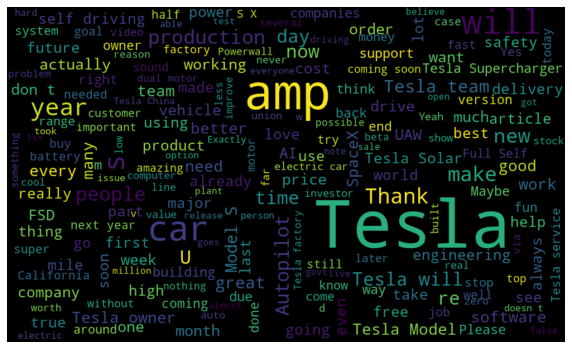

In [33]:
plt.figure(figsize=(10,8))
allWords = ' '.join([twts for twts in df_tesla["Tweet"]])
wordCloud = WordCloud(width = 1000, height = 600, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [34]:
# Get the number of tweets every year by Elon Musk
date_tesla_df = df_tesla.groupby(pd.DatetimeIndex(df_tesla["Date"]).year)["Tweet"].count()
date_tesla_df = date_tesla_df.to_frame()
date_tesla_df

,Tweet
Date,
2011,1
2012,30
2013,69
2014,29
2015,25
2016,80
2017,71
2018,505
2019,246


Text(0, 0.5, 'Frequency')

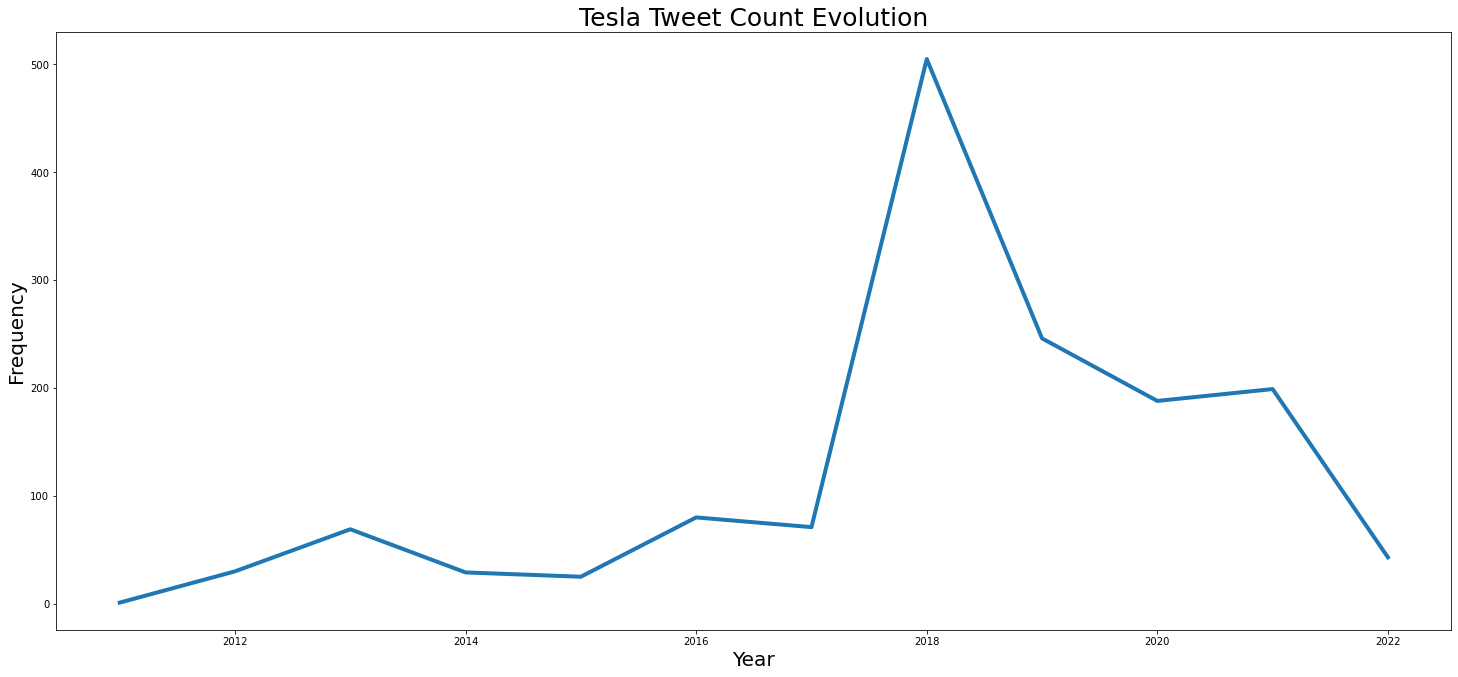

In [35]:
# Plot the number of tweets for spaceX by elon musk
plt.figure(figsize=(25, 11))
ax = sns.lineplot(data=date_tesla_df, x= "Date", y= "Tweet", lw=4)
plt.title("Tesla Tweet Count Evolution", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Frequency", size=20)

In [36]:
#Filter the twitter tweets from the df_tweets_new dataset
df_twitter= pd.DataFrame(columns = ['Date', 'Tweet'])

for i in range(len(df_tweets_final)):
    cur = df_tweets_final.loc[i].tweet
    cur = cur.lower()
    if 'twitter' in cur:
        df_twitter = df_twitter.append({'Date' : df_tweets_final.loc[i].date, 'Tweet' : df_tweets_final.loc[i].tweet, 
                                  "nlikes":df_tweets_final.loc[i].nlikes,"nreplies":df_tweets_final.loc[i].nreplies,
                                  "nretweets":df_tweets_final.loc[i].nretweets,
                                  'replies_count' : df_tweets_final.loc[i].replies_count,
                                  'retweets_count' : df_tweets_final.loc[i].retweets_count,
                                  'likes_count' : df_tweets_final.loc[i].likes_count,
                                 }, 
                ignore_index = True)

df_twitter['Date'] = pd.to_datetime(df_twitter['Date'], format='%Y-%m-%d')
df_twitter

,Date,Tweet,likes_count,nlikes,nreplies,nretweets,replies_count,retweets_count
0,2015-05-22,What are the best riddles you've heard that are short enough for Twitter?,NaN,599.0,638.0,208.0,NaN,NaN
1,2016-04-04,"Signing off from impromptu Twitter AMA. Thanks for the suggestions. Btw, we really will have mor...",NaN,3252.0,241.0,367.0,NaN,NaN
2,2016-07-05,Exactly! I love Twitter.,NaN,328.0,13.0,41.0,NaN,NaN
3,2016-10-04,I use twitter for news orgs. My Insta has same women as men. What's up with the phoney PC police...,NaN,5254.0,312.0,1598.0,NaN,NaN
4,2016-10-06,"Yeah, and several others at various times. My twitter list is trimmed down to almost all news/co...",NaN,225.0,20.0,16.0,NaN,NaN
...,...,...,...,...,...,...,...,...
84,2022-01-21,Twitter is spending engineering resources on this bs while crypto scammers are throwing a spambo...,149072.0,NaN,NaN,NaN,7983.0,10037.0
85,2022-03-02,🤣🤣 That was me tweeting from when someone else had snatched my name. I was actually one of the e...,25778.0,NaN,NaN,NaN,1182.0,983.0
86,2022-03-02,"Tesla has created over 50,000 US jobs building electric vehicles &amp; is investing more than do...",270829.0,NaN,NaN,NaN,8787.0,37338.0
87,2022-03-02,🤣🤣 That was me tweeting from when someone else had snatched my name. I was actually one of the e...,25779.0,NaN,NaN,NaN,1182.0,983.0


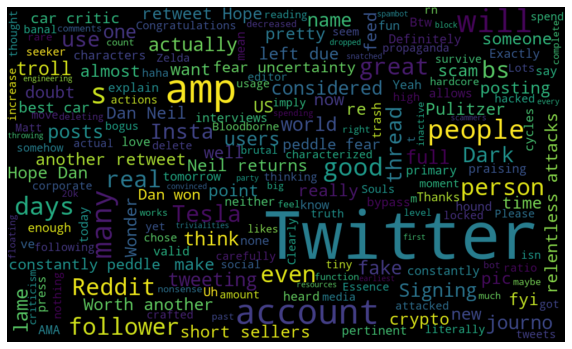

In [37]:
plt.figure(figsize=(10,8))
stopwords_wc = set(stopwords_wc)
allWords = ' '.join([twts for twts in df_twitter["Tweet"]])
wordCloud = WordCloud(stopwords=stopwords_wc, width = 1000, height = 600, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [38]:
# Get the number of tweets every year by Elon Musk
date_twitter_df = df_twitter.groupby(pd.DatetimeIndex(df_twitter["Date"]).year)["Tweet"].count()
date_twitter_df = date_twitter_df.to_frame()
date_twitter_df

,Tweet
Date,
2015,1
2016,4
2017,4
2018,43
2019,10
2020,15
2021,6
2022,6


Text(0, 0.5, 'Frequency')

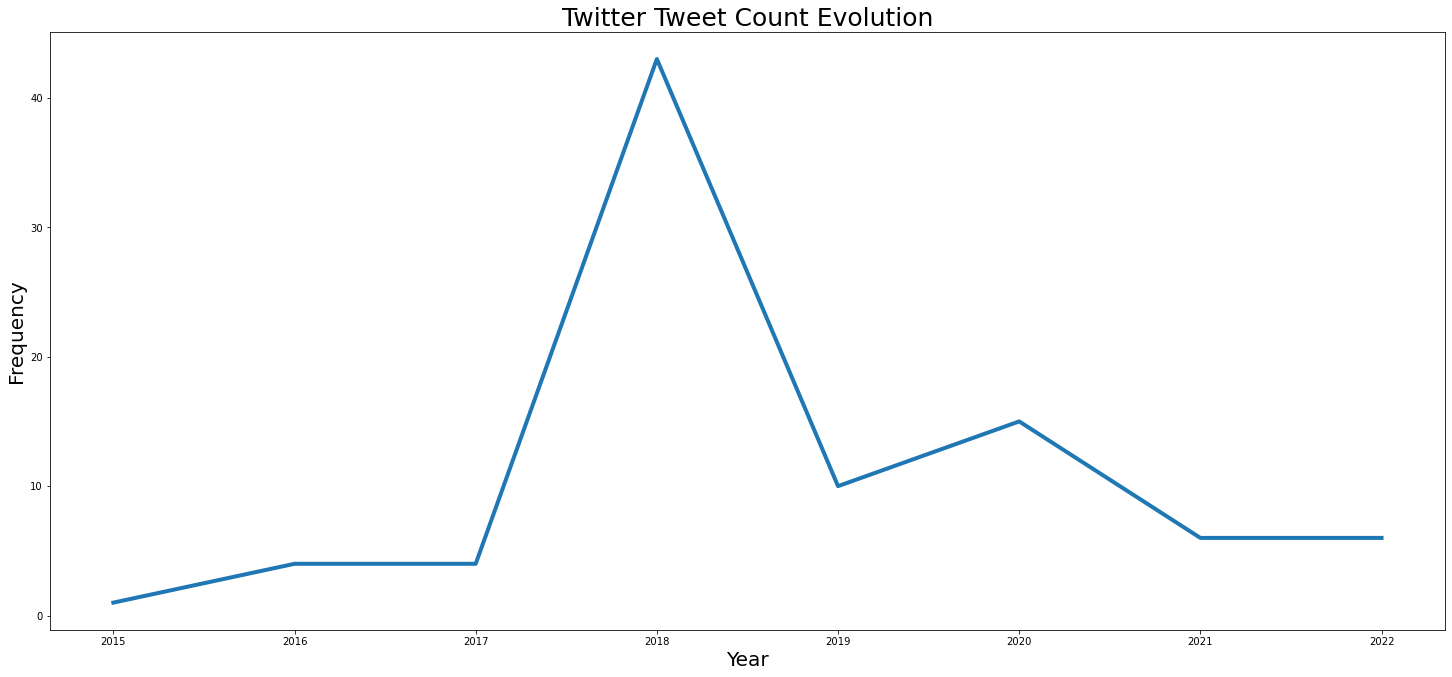

In [39]:
# Plot the number of tweets for Twitter by elon musk
plt.figure(figsize=(25, 11))
ax = sns.lineplot(data=date_twitter_df, x= "Date", y= "Tweet", lw=4)
plt.title("Twitter Tweet Count Evolution", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Frequency", size=20)

In [40]:
# Get Popularity Information
popularity = ["likes_count", "retweets_count", "replies_count"]
popularity_df = tweets[tweets["year"]!="2021"].groupby("year").agg({popularity[0] : 'sum',
                                                                    popularity[1] : 'sum',
                                                                    popularity[2] : 'sum',
                                                                    'tweet' : 'count'}).reset_index()
popularity_df["likes_count"] = popularity_df["likes_count"]/popularity_df["tweet"]
popularity_df["retweets_count"] = popularity_df["retweets_count"]/popularity_df["tweet"]
popularity_df["replies_count"] = popularity_df["replies_count"]/popularity_df["tweet"]

NameError: name 'tweets' is not defined

In [41]:
df_doge.to_csv("doge_tweets.csv",index=False)
df_spaceX.to_csv("spaceX_tweets.csv",index=False)
df_tesla.to_csv("tesla_tweets.csv",index=False)
df_twitter.to_csv("twitter_tweets.csv",index=False)